## Data Preparation (Import libraries, data cleaning & data wrangling)
***

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [3]:
#check for duplicate.
df.MEMBER_NO.nunique() == len(df) 

True

In [4]:
#check for load time uniqueness.
df.LOAD_TIME.unique()

array(['3/31/2014'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

> Beberapa kolom terdapat missing values, tetapi tidak semua kolom akan kita gunakan.

In [6]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


> Check for statistical columns. Semua terlihat normal kecuali untuk average discount dimana ada angka melebihi 100% yang tidak logis.

In [7]:
df = df[['FFP_DATE','LOAD_TIME','LAST_FLIGHT_DATE','FFP_TIER','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]

> Saya hanya akan menggunakan kolom diatas.

In [8]:
df = df[(df.LAST_FLIGHT_DATE != '2014/2/29  0:00:00') & (df.avg_discount <= 1)]

> Saya membuang last flight date pada 29 februari 2014 karena tanggal tersebut adalah tanggal invalid yang tidak ada dikalender dan untuk avg discountnya saya membuang yang melebihi 100%.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59640 entries, 0 to 62987
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FFP_DATE          59640 non-null  object 
 1   LOAD_TIME         59640 non-null  object 
 2   LAST_FLIGHT_DATE  59640 non-null  object 
 3   FFP_TIER          59640 non-null  int64  
 4   FLIGHT_COUNT      59640 non-null  int64  
 5   SEG_KM_SUM        59640 non-null  int64  
 6   avg_discount      59640 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 3.6+ MB


> Dari kolom baru yang salah pilih, tidak ada missing values, hanya perlu dilakukan convert data type object ke tipe data date-time.

In [10]:
listdate = ['FFP_DATE','LOAD_TIME','LAST_FLIGHT_DATE']
for x in listdate:
    df[x] = pd.to_datetime(df[x])

In [11]:
df['Length'] = (df.LOAD_TIME - df.FFP_DATE).dt.days
df['Recency'] = (df.LOAD_TIME - df.LAST_FLIGHT_DATE).dt.days
df['Tier'] = df.FFP_TIER
df['Frequency'] = df.FLIGHT_COUNT
df['Monetary'] = df.SEG_KM_SUM
df['Coef_disc'] = df.avg_discount
df = df[['Length','Recency','Tier','Frequency','Monetary','Coef_disc']]

> Penjelasan kolom:<br>
1.Length = Lamanya membership customer.<br>
2.Recency = Lamanya jarak waktu dari penerbangan terakhir.<br>
3.Tier = Level tier customer.<br>
4.Frequency = Jumlah penerbangan customer.<br>
5.Monetary = Jumlah kilometer penerbangan yang ditempuh customer.<br>
6.Coef_disc = Rata-rata discount yang didapat customer.

> Saya menggunakan metode LRFMC dan menambahkan 1 kolom yaitu 'Tier' karena saya rasa kolom ini cukup krusial dalam melakukan clustering.

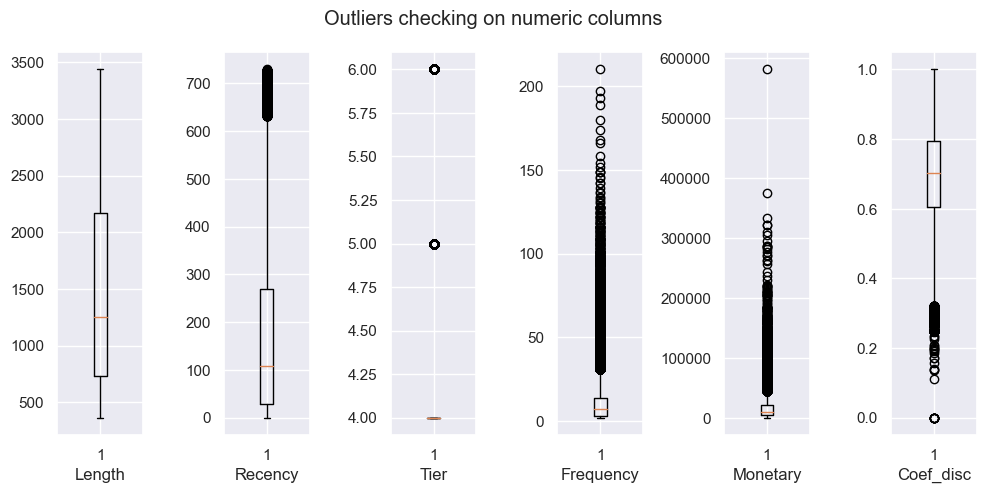

In [12]:
fig, axarr = plt.subplots(1,6, figsize=(10, 5))
for x in df.columns:
    axarr[df.columns.get_loc(x)].boxplot(df[x])
    axarr[df.columns.get_loc(x)].set_xlabel(x)
plt.suptitle("Outliers checking on numeric columns")
fig.tight_layout(pad=1)
plt.show() 

In [13]:
df = df[df.Monetary < 400000]

> Disini saya membuang 1 baris outliers monetary yang diatas 400000.

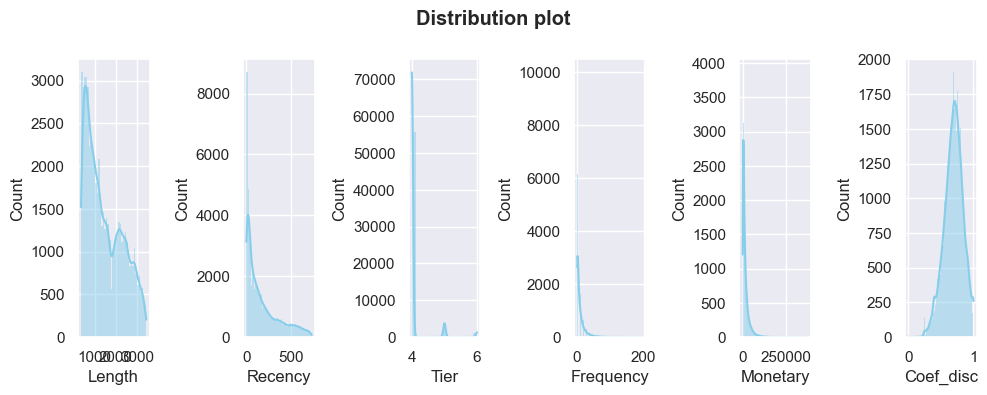

In [14]:
fig, axarr = plt.subplots(1,6, figsize=(10, 4))
for x in df.columns:
    sns.histplot(df[x],color='skyblue', kde=True, edgecolor='none', ax=axarr[df.columns.get_loc(x)])
plt.suptitle("Distribution plot", weight='bold')
fig.tight_layout(pad=1)

In [15]:
#log trasnform skew features.
dfpure = df.copy()
df.Recency = df.Recency + 1 # + 1 because recency minimum is 0.
for x in ['Length','Recency','Frequency','Monetary']:
    df[x] = np.log(df[x])

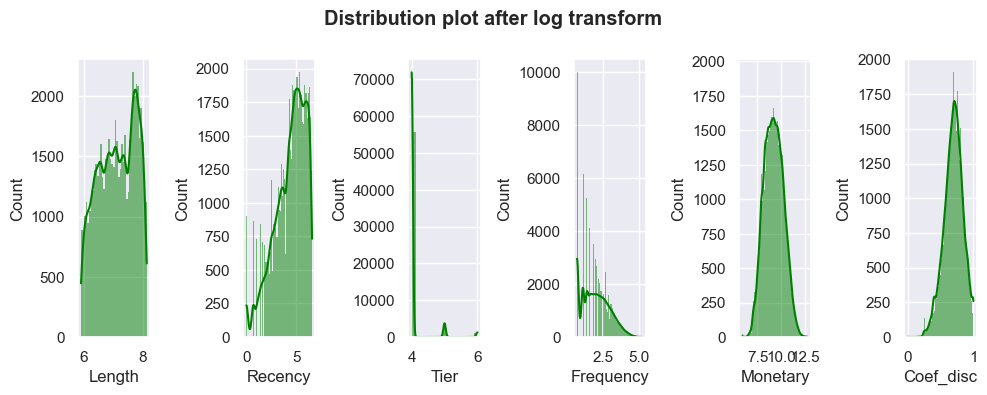

In [16]:
fig, axarr = plt.subplots(1,6, figsize=(10, 4))
for x in df.columns:
    sns.histplot(df[x],color='green', kde=True, edgecolor='none', ax=axarr[df.columns.get_loc(x)])
plt.suptitle("Distribution plot after log transform", weight='bold')
fig.tight_layout(pad=1)

In [17]:
#scaling using standard scaler.
dfx = StandardScaler().fit_transform(df)
dfstd = pd.DataFrame(dfx)
dfstd.columns = df.columns

In [18]:
dfstd.describe()

,Length,Recency,Tier,Frequency,Monetary,Coef_disc
count,5.963900e+04,5.963900e+04,5.963900e+04,5.963900e+04,5.963900e+04,5.963900e+04
mean,5.718750e-17,1.296250e-16,2.563906e-16,1.372500e-16,-1.037000e-15,-6.481250e-16
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-1.955181e+00,-2.844978e+00,-2.484357e-01,-1.357563e+00,-3.264587e+00,-4.827939e+00
25%,-8.446506e-01,-6.361664e-01,-2.484357e-01,-9.292179e-01,-7.501851e-01,-6.268632e-01
50%,3.261621e-02,2.016852e-01,-2.484357e-01,-3.410817e-02,-2.091110e-02,5.179314e-02
75%,9.091814e-01,7.931596e-01,-2.484357e-01,6.981523e-01,7.203110e-01,6.849180e-01
max,1.651864e+00,1.436688e+00,5.843856e+00,3.491504e+00,3.573782e+00,2.109984e+00


## Modelling
***

<AxesSubplot: >

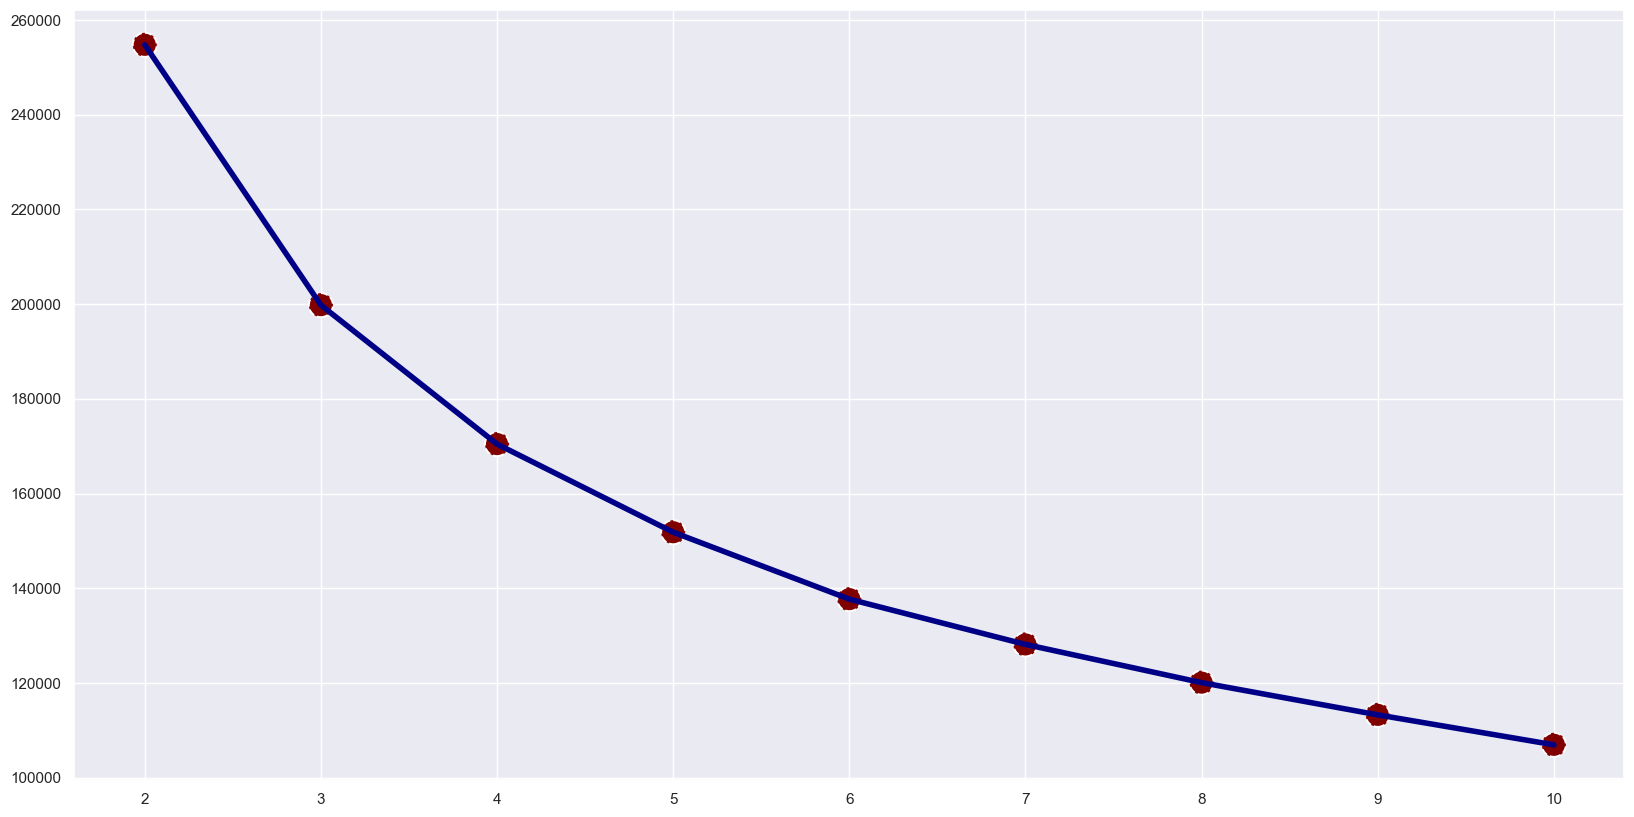

In [19]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dfstd)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')


> Disini saya menggunakan 5 clusters.

In [20]:
kmeans = KMeans(n_clusters=5, random_state=112).fit(dfstd)
dfstd['clusters'] = kmeans.labels_
dfpure['clusters'] = kmeans.labels_

In [21]:
pca = PCA(n_components=2)

pca.fit(dfstd)
pcs = pca.transform(dfstd)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = dfstd['clusters']
data_pca.head()

,PC 1,PC 2,clusters
0,7.101829,-0.812661,0
1,6.292570,0.085417,0
2,7.394654,-0.771398,0
3,6.743117,-0.827757,0
4,5.260103,-1.207730,0


<AxesSubplot: xlabel='PC 1', ylabel='PC 2'>

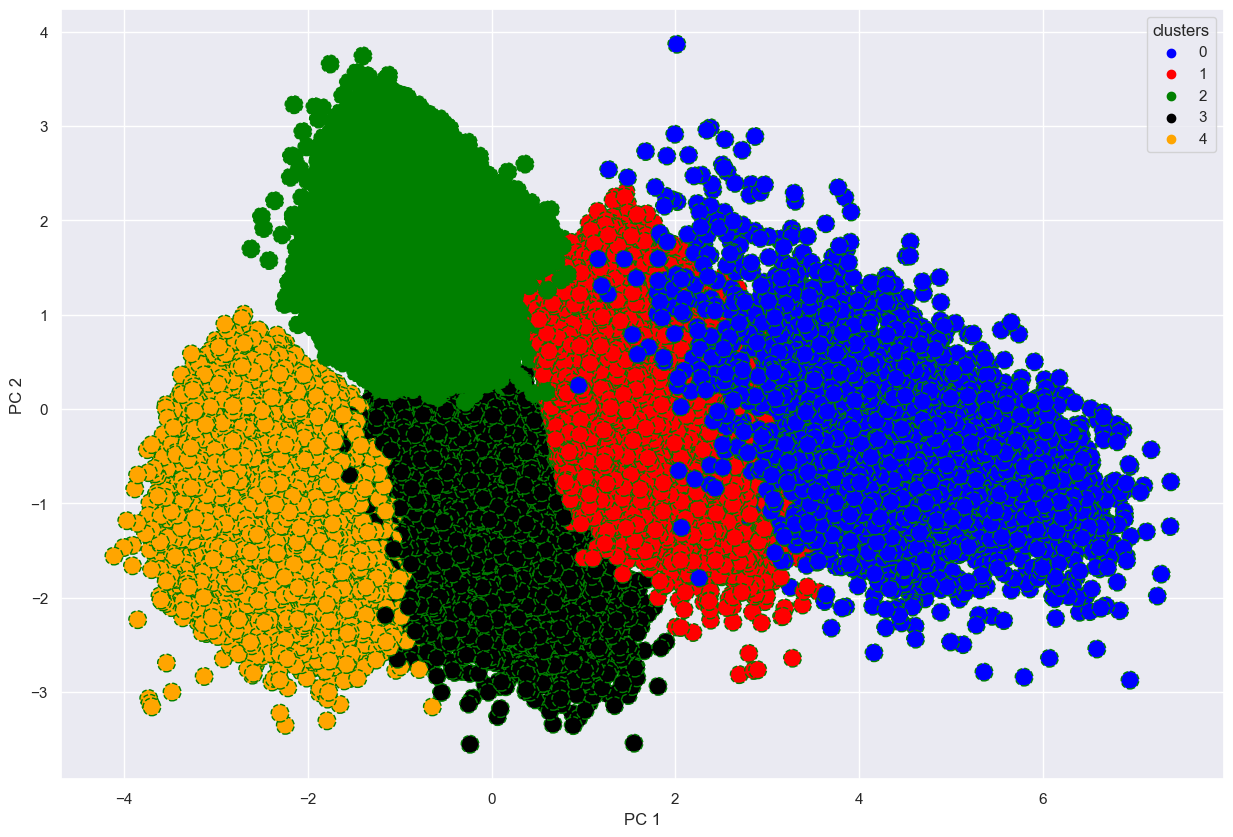

In [22]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='green',
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green','black','orange'],
    s=160,
    ax=ax
)

In [23]:
display(dfpure.groupby('clusters').agg(['mean','median']))

Length             Recency             Tier         Frequency  \
                 mean  median        mean median      mean median       mean   
clusters                                                                       
0         1832.485294  1824.0   25.737658   10.0  5.257353    5.0  43.958246   
1         2145.059878  2158.0   69.988334   38.0  4.000000    4.0  17.496681   
2         1475.969898  1304.0  307.303515  273.0  4.003017    4.0   3.773610   
3          722.110123   689.0   98.803300   65.0  4.001201    4.0  12.103156   
4         1282.287077  1057.0  272.053092  234.0  4.001192    4.0   3.644333   

                     Monetary          Coef_disc            
         median          mean   median      mean    median  
clusters                                                    
0          41.0  58399.909664  50934.5  0.765243  0.762676  
1          15.0  25666.553851  20952.0  0.703269  0.703066  
2           3.0   5043.632411   4256.0  0.812473  0.800000  
3          10.0  18320.496877  14974.0  0.702310  0.702041  
4           3.0   5704.654824   4844.0  0.518081  0.533823

>Analisa cluster 0:<br>
>1. Untuk mean lengthnya ada di 1800-an, ini bukan angka terkecil maupun terbesar diantara semua cluster.<Br>
2. Untuk recency, mean-nya adalah yang paling kecil diantara semua cluster.<br>
3. Untuk Tier, level tiernya adalah yang paling tinggi diantara semua cluster.<br>
4. Untuk Frequency, cluster ini juga memiliki frequency paling tinggi diantara semua cluster, bahkan perbedaaanya cukup jauh. <br>
5. Untuk monetary, cluster ini juga merupakan tertinggi.<br>
6. Untuk discount, cluster ini merupakan kedua yang tertinggi yaitu pada 76%.<br>
Insights : Orang yang mengambil tier 5, maka kemungkinan besar dia akan sering melakukan penerbangan.

>Analisa cluster 1:<br>
>1.Untuk mean lengthnya merupakan tertinggi diantara semua clusters.<br>
2.Untuk recency, mean-nya adalah kedua terkecil setelah clusters 0.<br>
3.Untuk tier, cukup standar yaitu ada pada tier 4.<Br>
4.Untuk frequency, mean-nya juga kedua tersering setelah clusters 0.<br>
5.Untuk monetary, mean-nya juga kedua tersering setelah clusters 0.<br>
6.Untuk coef disc, nilainya berada sedikit dibawah clusters 0.<br>
Insights : orang pada cluster ini merupakan orang dengan membership terlama, namun penerbangan yang dilakukan tidak sesering atau sebanyak pada clusters 0

>Analisa cluster 2:<Br>
1.Untuk mean lengthnya berada ditengah-tengah antara semua clusters.<br>
2.Untuk recency, mean-nya merupakan yang terlama.<br>
3.Untuk tier, cukup standar yaitu ada pada tier 4.<br>
4.Untuk frequency, nilainya sangat kecil sekali.<br>
5.Untuk monetary, nilainya juga sangat kecil dan bahkan menjadi yang paling kecil diantara semua clusters.<br>
6.Untuk coef disc, nilainya merupakan yang terbesar.<Br>
Insights: orang pada cluster ini adalah orang yang jarang melakukan penerbangan, namun disc yang didapatkan merupakan yang tertinggi diantara semua clusters.

>Analisa cluster 3:<br>
1.Untuk mean lengthnya merupakan yang paling rendah diantara semua clusters.<br>
2.Untuk recency, meannya juga tidak terlalu rendah dan tidak terlalu tinggi.<Br>
3.Untuk tier, cukup standar yaitu ada pada tier 4.<br>
4.Untuk frequency dan monetary juga cukup berada ditengah-tengah.<br>
5.Untuk coef disc, cukup rendah ada diangka 70%.<br>
Insights : orang pada cluster ini adalah orang yang paling baru membershipnya, penerbangan yang dilakukan juga cukup standar, tidak terlalu banyak dan tidak terlalu sedikit.

>Analisa cluster 4:<br>
1.Untuk mean lengthnya merupakan kedua terendah setelah clusters 3.<br>
2.Untuk recency, meannya juga merupakan kedua terlama setelah clusters 2.<br>
3.Untuk tier, cukup standar yaitu ada pada tier 4.<br>
4.Untuk frequency dan monetary, nilainya sangat kecil, mirip seperti clusters 2.<br>
5.Untuk discount, nilainya merupakan yang terendah diantara semua clusters.<br>
Insights : orang pada cluster ini mirip seperti dengan cluster 2, hanya saja discount yang didapat sangat kecil yaitu pada 53% dimana pada cluster lain rata-ratanya diatas 70%.

Rangkuman cluster terbaik : <br>
Untuk cluster terbaik yaitu ada pada cluster 0, tier yang dimiliki merupakan tertinggi dan frekuensi dan jarak penerbangan juga merupakan yang tertinggi. Cluster kedua terbaik yaitu ada pada cluster 1, dimana membership pada cluster ini adalah yang terlama, namun memang frekuensi dan jarak penerbangannya tidak sebanyak pada cluster 0. Cluster terbaik ketiga ada pada cluster 3, dimana membership pada cluster ini adalah yang paling baru, dan frekuensi dan jarak penerbangannya masih dibawah cluster 1 sedikit. Cluster 2 dan 4 merupakan cluster terburuk, dimana jumlah penerbangan dan jarak penerbangan sangat sedikit sekali dibandingkan dengan cluster lainnya. Perlu dilakukan analisa lebih mendalam mengapa customer pada cluster 2 dan 4 jarang melakukan penerbangan.